## Name - Prasad Ligade

# Predicting Price of House using KNearestNeighbour Regressor

## Use KNearestNeighbourRegressor to Predict Price of House.

- Here is the dataset https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt

1. Use pandas to get some insights into the data (10 marks)
2. Show some interesting visualization of the data (10 marks)
3. Manage data for training & testing (20)
4. Finding a better value of k (10)

In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1) Use pandas to get some insights into the data

In [2]:
#load the dataset
data = pd.read_csv('house_rental_data.csv.txt', sep = ",")
data

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [3]:
data.shape

(645, 8)

In [5]:
#remove unnessesary column
data = data.drop('Unnamed: 0', axis = 1)
data

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [6]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [7]:
data.tail()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000
644,1376.946,6,7,3,2,1,36000


In [8]:
data.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [10]:
data['Bedroom'].unique()

array([2, 4, 3, 1, 5, 6, 7], dtype=int64)

In [11]:
data['Living.Room'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [12]:
data['Bathroom'].unique()

array([2, 1, 4, 3, 0, 5], dtype=int64)

In [13]:
#renaming column name
data.rename(columns = {'Living.Room': 'Living_Room'}, inplace = True)

In [14]:
data

,Sqft,Floor,TotalFloor,Bedroom,Living_Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [15]:
round(data.describe(),2)

,Sqft,Floor,TotalFloor,Bedroom,Living_Room,Bathroom,Price
count,645.00,645.00,645.00,645.00,645.00,645.00,645.00
mean,1527.66,5.94,10.86,2.84,1.81,1.81,61986.82
std,767.39,3.88,5.00,1.01,0.46,0.68,35635.09
min,359.36,1.00,1.00,1.00,0.00,0.00,6100.00
25%,925.08,3.00,7.00,2.00,2.00,1.00,39000.00
50%,1423.20,5.00,12.00,3.00,2.00,2.00,50000.00
75%,1892.86,8.00,14.00,4.00,2.00,2.00,75000.00
max,5856.47,22.00,38.00,7.00,4.00,5.00,250000.00


In [16]:
#find duplicate rows
data.duplicated().sum()

66

- There are 66 duplicate rows present so we need to delete it

In [17]:
data.duplicated().tail()

640    False
641    False
642    False
643     True
644    False
dtype: bool

In [18]:
data[data['Price'] == 65000]

,Sqft,Floor,TotalFloor,Bedroom,Living_Room,Bathroom,Price
9,1423.200,4,5,4,2,2,65000
30,1732.746,8,12,4,2,2,65000
43,1352.040,1,4,4,2,2,65000
113,2088.546,8,19,3,2,2,65000
196,1732.746,8,12,4,2,2,65000
208,1526.382,8,12,4,2,2,65000
209,1601.100,1,4,3,2,2,65000
295,1579.752,10,12,4,1,1,65000
310,1458.780,4,6,2,1,2,65000
325,1707.840,3,14,3,2,2,65000


- Here we can see that row no 643 and 325 have the same values, so delete all the duplicated rows

In [19]:
data.drop_duplicates(keep=False, inplace=True)

In [20]:
data.shape

(528, 7)

In [21]:
data.duplicated().sum()

0

In [23]:
# check the null values
data.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living_Room    0
Bathroom       0
Price          0
dtype: int64

## 2) Show some interesting visualization of the data

<AxesSubplot:xlabel='Bedroom', ylabel='count'>

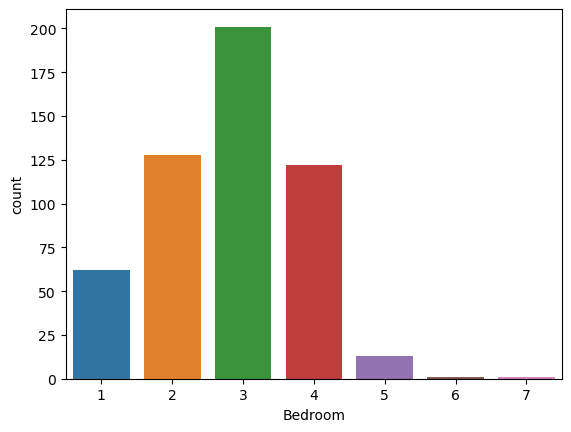

In [24]:
sns.countplot( x = data['Bedroom'])

<AxesSubplot:xlabel='Living_Room', ylabel='count'>

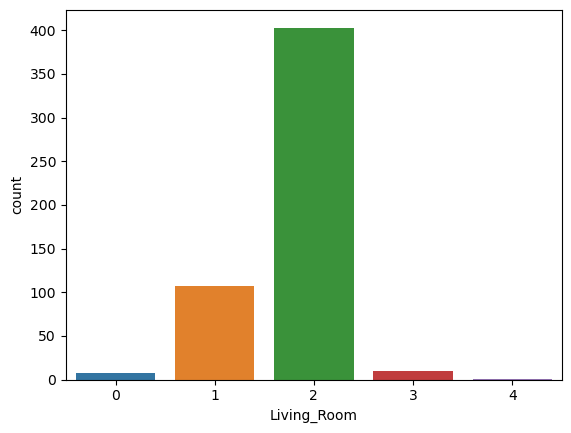

In [25]:
sns.countplot( x = data['Living_Room'])

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

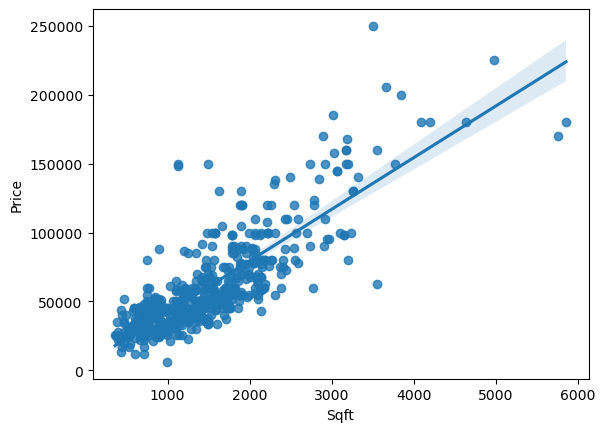

In [26]:
sns.regplot(x = data['Sqft'], y = data['Price'])

<AxesSubplot:xlabel='TotalFloor', ylabel='Count'>

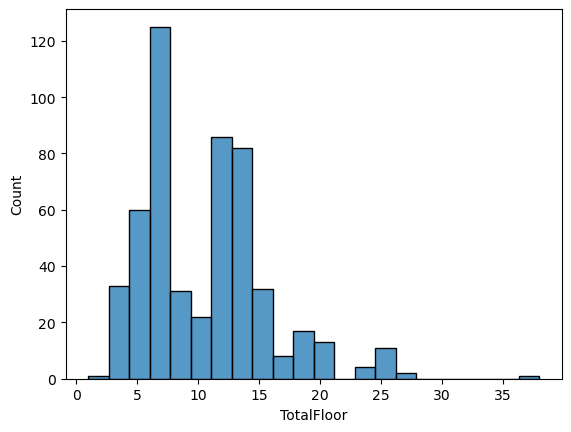

In [27]:
sns.histplot( x = data['TotalFloor'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

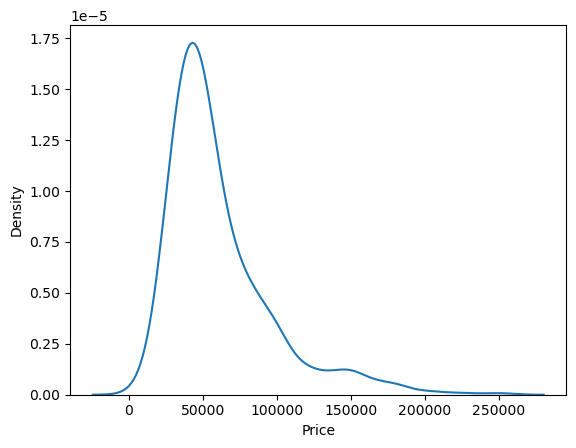

In [28]:
sns.kdeplot(data['Price'])

<AxesSubplot:>

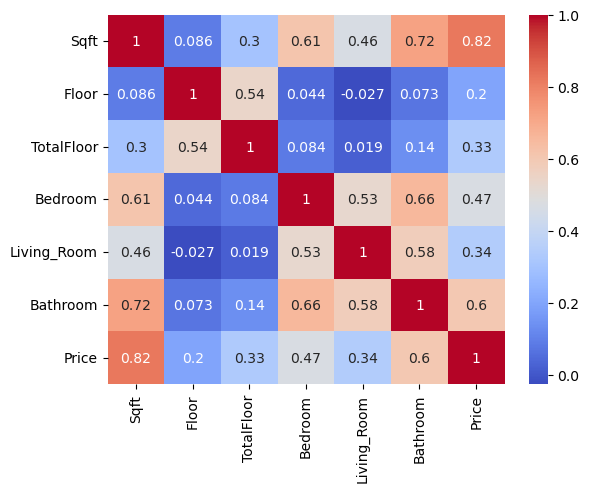

In [29]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

## 3) Manage data for training & testing

In [30]:
X = data.drop('Price', axis = 1)

y = data['Price']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr

KNeighborsRegressor()

In [33]:
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [34]:
y_pred = knr.predict(X_test)
y_pred

array([ 25959.8,  40805.6,  50400. ,  38200. ,  55400. ,  90600. ,
        48319.8,  38206.4,  44700. ,  91399.8,  25806. ,  47700. ,
        71600. ,  84599.8,  46500. ,  52400. ,  60200. ,  64600. ,
        52800. ,  40339.8,  79600. ,  44577.6,  57139.8,  52000. ,
        37200. , 130000. ,  51623.8,  90600. ,  73160. ,  85000. ,
        77000. ,  38600. , 130000. ,  76600. , 137200. ,  52000. ,
        31300. ,  88599.8,  33200. ,  63999.8,  49160. , 139999.8,
        50300. ,  54599.8,  85000. ,  40560. ,  90999.8,  50400. ,
        55400. ,  52400. ,  54800. ,  39200. ,  33006.4, 193000. ,
        33799.8,  75400. ,  47100. , 105599.8,  30406. , 104399.8,
        40200. ,  72997.8,  56560. ,  41200. , 122691.2,  49615.4,
        67400. ,  61800. ,  70400. ,  90600. ,  54520. ,  70400. ,
        63400. ,  98999.8,  43400. ,  76977.6,  31300. ,  41600. ,
        52599.8,  60600. ,  25960. ,  45177.6,  75599.8,  74539.8,
        33799.8,  33799.8,  29700. ,  42160. ,  71199.8,  8520

In [35]:
X_test

,Sqft,Floor,TotalFloor,Bedroom,Living_Room,Bathroom
197,526.584,13,17,2,1,1
495,853.920,8,14,2,1,1
7,757.854,5,14,1,0,1
520,1074.516,7,10,3,1,2
98,1707.840,13,20,2,2,2
...,...,...,...,...,...,...
621,4198.440,15,19,7,3,4
309,1245.300,3,12,1,2,1
230,1672.260,3,7,3,2,2
403,1188.372,2,14,3,2,2


In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7408038247142206

## 4) Finding a better value of k

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [38]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 19196.173544853955
RMSE value for k=  2 is: 19620.71065419068
RMSE value for k=  3 is: 18092.199901148084
RMSE value for k=  4 is: 17807.30388884024
RMSE value for k=  5 is: 17527.771705356456
RMSE value for k=  6 is: 17447.297046499025
RMSE value for k=  7 is: 17533.598595730742
RMSE value for k=  8 is: 17640.28410268991
RMSE value for k=  9 is: 17633.137490996323
RMSE value for k=  10 is: 17313.675331819653
RMSE value for k=  11 is: 17315.83422682599
RMSE value for k=  12 is: 17555.855334152544
RMSE value for k=  13 is: 17813.07771615668
RMSE value for k=  14 is: 17968.815506126262
RMSE value for k=  15 is: 18187.9642282947
RMSE value for k=  16 is: 18306.6331754227
RMSE value for k=  17 is: 18342.228988111052
RMSE value for k=  18 is: 18249.28816137086
RMSE value for k=  19 is: 18110.436134627933
RMSE value for k=  20 is: 18092.971898883752


<AxesSubplot:>

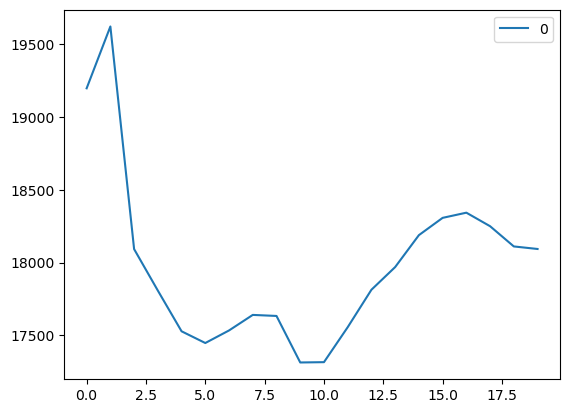

In [39]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

- At k = 1 we get the highest RMSE value. The RMSE value decreases as we increase the k value. At k= 11, the RMSE is approximately 17315 and shoots upon further increasing the k value. We can safely say that k=11 will give us the best result in this case. 

In [40]:
knr2 = KNeighborsRegressor(n_neighbors = 11)
knr2

KNeighborsRegressor(n_neighbors=11)

In [41]:
knr2.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [42]:
y_pred_2 = knr2.predict(X_test)

In [43]:
r2_score(y_test, y_pred_2)

0.7470340826817804

In [44]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11, 12, 13]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 11}

- Here also using GridsearchCV best value of k we get is k = 11.